# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

run_count = 0

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
    
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
distinctmyList =[]
a_list=[]
y_dataset = np.concatenate((y_train, y_test), axis=0)

for i in y_dataset:
    a_list.append(i)
distinctmyList.append(list(set(a_list)))
n_classes = len(distinctmyList[0])

print("Number of training (before splitting up a validation set) examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training (before splitting up a validation set) examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

36


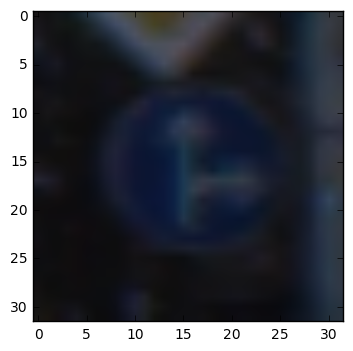

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_random_image(img_pack, label_pack, color):
    # print a random image of a img_pack and its label
    index = random.randint(0, len(img_pack))
    image = img_pack[index].squeeze()
    #plt.figure(figsize=(1,1))
    if color == 1:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    print(label_pack[index])
    
# print a random image of a img_pack and its label
show_random_image(X_train, y_train, 1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

11


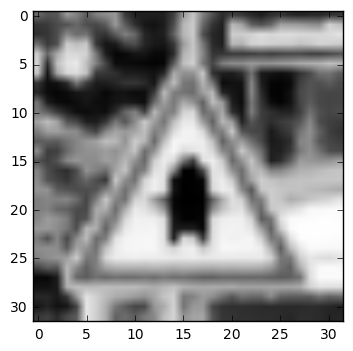

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def preprocess_images(img_array):
    # Don't do preprocessing if this code block is called a second time
    global run_count
    if run_count <= 1:
        run_count += 1 
        new_array = []
        for i in range(len(img_array)):
            # Change to grayscale
            image_mod_1 = cv2.cvtColor(img_array[i], cv2.COLOR_RGB2GRAY)
            # Equalize the histogram
            image_mod_2 = cv2.equalizeHist(image_mod_1)
            # Normalize the values (-1 to 1)
            image_mod_3 = image_mod_2/127.5 - 1
            new_array.append(image_mod_3)
        new_array = np.array(new_array).reshape((-1,32,32,1))
        return new_array
    else:
        return img_array

# Preprocess training data
X_train = preprocess_images(X_train)

# Preprocess test data
X_test = preprocess_images(X_test)
    
# Show random image of training data (grayscaled image)
show_random_image(X_train, y_train, 0)

18


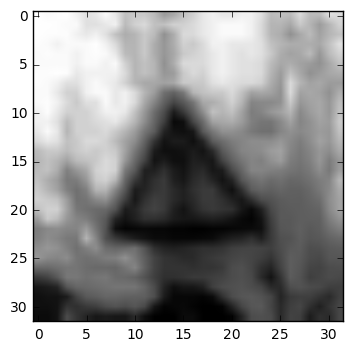

In [5]:
# Show random image of test data (grayscaled image)
show_random_image(X_test, y_test, 0)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

TODO !!!!!!!!!

Shape: (32, 32)


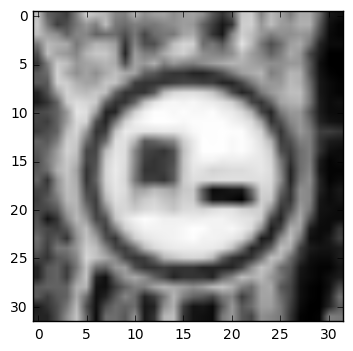

In [6]:
#Generate data additional data

# Show some information about the training set
count_biggest_class = 0
total_number_images_unmod = 0
w, h = 3, 43 
info_classes = [[0 for x in range(w)] for y in range(h)] 

# Set the class IDs in the first column
for i in range(0, len(info_classes)):
    info_classes[i][0] = i
       
# Count the number of images per class and write it in the second and third column
for i in range(len(y_train)):
    count = y_train[i]
    info_classes[count][1] += 1
    info_classes[count][2] += 1
    
# Find the class with the most images
for i in range(0, len(info_classes)):
    total_number_images_unmod += info_classes[i][1]
    if info_classes[i][1] > count_biggest_class:
        count_biggest_class = info_classes[i][1]
        
# TODO rewrite it:
# code found here https://github.com/vxy10/ImageAugmentation/blob/master/img_transform_NB.ipynb
# https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3#.wlzus6b12
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

def get_random_image(img_pack):
    # print a random image of a img_pack and its label
    index = random.randint(0, len(img_pack))
    image = img_pack[index].squeeze()       
    return image
        
# Only for testing -> Default is 0, set to 1 to test
test_debug = 1
if test_debug == 1:
    testimage = get_random_image(X_train)
    # What's the shape of an traffic sign image?
    testimage_shape = testimage.shape
    print('Shape: ' + str(testimage_shape))
    plt.imshow(testimage, cmap='gray')

Shape: (32, 32, 1)


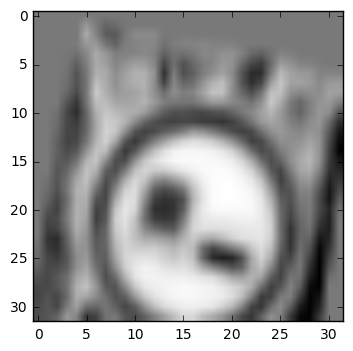

In [7]:
# Only for testing -> see above
if test_debug == 1:
    modtest = testimage.reshape((32,32,1))
    modtest_shape = modtest.shape
    print('Shape: ' + str(modtest_shape))
    modimage = transform_image(modtest,20,10,5)
    plt.imshow(modimage, cmap='gray')

In [27]:
# Only for testing -> see above
if test_debug == 1:
    index_in = 1000
    new_array = []
    print('Image')
    print(X_train.shape)
    image_in = X_train[index_in]
    
    #print(image_in.shape)
    image_out = transform_image(image_in,20,10,5)
    new_array.append(image_out)
    new_array = np.array(new_array).reshape((-1,32,32,1))
    print(new_array.shape)
    X_train = np.vstack((X_train, new_array))
    print(X_train.shape)
    print('Label')
    print(y_train.shape)
    label_in = y_train[index_in]
    print('Label_data ' + str(label_in))
    new_array_label = np.array([label_in])
    print(new_array_label.shape)
    print('Label_data_out ' + str(new_array_label))
    
    y_train = np.vstack((y_train, new_array_label))
    

    #plt.imshow(X_train[39210].squeeze(), cmap='gray')

    #print(y_train.shape)
    #add_labels = y_train[index_in]
    #np.append(np.array(y_train), np.array(add_labels))
    #print(y_train.shape)




Image
(39224, 32, 32, 1)
(1, 32, 32, 1)
(39225, 32, 32, 1)
Label
(39209,)
Label_data 1
(1,)
Label_data_out [1]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [13]:
# Generate more data (augmented data)
images_sum = 0
count1 = 0
count2 = 0
print(X_train.shape)
for x in range(0, len(X_train)):
#for x in range(5500, 5700):
    #print('ClassID: ' + str(y_train[x]))
    images_per_class = info_classes[y_train[x]][1]
    #print('Images per Class: ' + str(images_per_class))
    images_to_generate = int(round(((count_biggest_class - images_per_class) / images_per_class),0))
    if images_to_generate == 0:
        if info_classes[y_train[x]][2] < count_biggest_class:
            images_to_generate = 1
    if info_classes[y_train[x]][2] >= count_biggest_class:
        images_to_generate = 0
    #print('Images to generate: ' + str(images_to_generate))
    images_sum = images_sum + images_to_generate
    for i in range(0, images_to_generate):
        # Count to print progress-data
        count2 += 1
        if count2 > 100:
            count2 = 0
            count1 += 1
            printcount = count1 * 100
            print('Generated images so far: ' + str(printcount))
        #new_array = []
        #image_in = X_train[x]
        #image_out = transform_image(image_in,20,10,5)
        #new_array.append(image_out)
        #new_array = np.array(new_array).reshape((-1,32,32,1))
        #X_train = np.vstack((X_train, new_array))
        info_classes[y_train[x]][2] += 1
    
print('Images generated total: ' + str(images_sum)) 
print(X_train.shape)

(39209, 32, 32, 1)
Generated images so far: 100
Generated images so far: 200
Generated images so far: 300
Generated images so far: 400
Generated images so far: 500
Generated images so far: 600
Generated images so far: 700
Generated images so far: 800
Generated images so far: 900
Generated images so far: 1000
Generated images so far: 1100
Generated images so far: 1200
Generated images so far: 1300
Generated images so far: 1400
Generated images so far: 1500
Generated images so far: 1600
Generated images so far: 1700
Generated images so far: 1800
Generated images so far: 1900
Generated images so far: 2000
Generated images so far: 2100
Generated images so far: 2200
Generated images so far: 2300
Generated images so far: 2400
Generated images so far: 2500
Generated images so far: 2600
Generated images so far: 2700
Generated images so far: 2800
Generated images so far: 2900
Generated images so far: 3000
Generated images so far: 3100
Generated images so far: 3200
Generated images so far: 3300


In [18]:
# How many unique classes/labels there are in the dataset.
print("Number of unique classes: ", n_classes)

# Maximum images per class
print("Maximum images per class: ", count_biggest_class)

# Total number of images
print("Total number of images unmodified: ", total_number_images_unmod)

# Find total number of images (modified)
total_number_images_mod = 0
for i in range(0, len(info_classes)):
    total_number_images_mod += info_classes[i][2]

# Total number of images modified
print("Total number of images modified: ", total_number_images_mod)

# Show information per class (each row is one class)
for i in range(0, len(info_classes)):
    print('ClassID: ' + str(info_classes[i][0]) + '    number unmodified : ' + str(info_classes[i][1]) + '    number modified : ' + str(info_classes[i][2]))

Number of unique classes:  43
Maximum images per class:  2250
Total number of images unmodified:  39209
Total number of images modified:  94917
ClassID: 0    number unmodified : 210    number modified : 2250
ClassID: 1    number unmodified : 2220    number modified : 2250
ClassID: 2    number unmodified : 2250    number modified : 2250
ClassID: 3    number unmodified : 1410    number modified : 2250
ClassID: 4    number unmodified : 1980    number modified : 2250
ClassID: 5    number unmodified : 1860    number modified : 2250
ClassID: 6    number unmodified : 420    number modified : 2100
ClassID: 7    number unmodified : 1440    number modified : 2250
ClassID: 8    number unmodified : 1410    number modified : 2250
ClassID: 9    number unmodified : 1470    number modified : 2250
ClassID: 10    number unmodified : 2010    number modified : 2250
ClassID: 11    number unmodified : 1320    number modified : 2250
ClassID: 12    number unmodified : 2100    number modified : 2250
ClassID: 1

In [ ]:
# Split the data into training/validation/testing sets here.

# Split up the training data to get validation data
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of validation examples.
n_validation = len(X_validation)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the whole dataset.
distinctmyList =[]
a_list=[]
y_dataset = np.concatenate((y_train, y_test, y_validation), axis=0)

for i in y_dataset:
    a_list.append(i)
distinctmyList.append(list(set(a_list)))
n_classes = len(distinctmyList[0])

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

TODO !!!

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Shuffle training data -> TODO ist eigentlich preprocessing
X_train, y_train = shuffle(X_train, y_train)

EPOCHS = 25
BATCH_SIZE = 128

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

TODO !!!!

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate_accuracy(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss = total_loss + loss
    return total_loss / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate_accuracy(X_validation, y_validation)
        validation_loss = evaluate_loss(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.801
Validation Loss = 0.005

EPOCH 2 ...
Validation Accuracy = 0.880
Validation Loss = 0.003

EPOCH 3 ...
Validation Accuracy = 0.923
Validation Loss = 0.002

EPOCH 4 ...
Validation Accuracy = 0.939
Validation Loss = 0.002

EPOCH 5 ...
Validation Accuracy = 0.935
Validation Loss = 0.002

EPOCH 6 ...
Validation Accuracy = 0.958
Validation Loss = 0.001

EPOCH 7 ...
Validation Accuracy = 0.964
Validation Loss = 0.001

EPOCH 8 ...
Validation Accuracy = 0.964
Validation Loss = 0.001

EPOCH 9 ...
Validation Accuracy = 0.967
Validation Loss = 0.001

EPOCH 10 ...
Validation Accuracy = 0.966
Validation Loss = 0.001

EPOCH 11 ...
Validation Accuracy = 0.966
Validation Loss = 0.001

EPOCH 12 ...
Validation Accuracy = 0.973
Validation Loss = 0.001

EPOCH 13 ...
Validation Accuracy = 0.967
Validation Loss = 0.001

EPOCH 14 ...
Validation Accuracy = 0.972
Validation Loss = 0.001

EPOCH 15 ...
Validation Accuracy = 0.971
Validation Loss = 0.001

EPOCH 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

TODO !!!!

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

TODO !!!!!!

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.